## Project: FactoryGuard-AI
### Dataset: [NASA C-MAPSS-1 Turbofan Engine Degradation](https://www.kaggle.com/datasets/bishals098/nasa-turbofan-engine-degradation-simulation)
#### EDA


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Column names as defined by NASA
columns = ['engine_id', 'cycle'] + \
          [f'op_setting_{i}' for i in range(1, 4)] + \
          [f'sensor_{i}' for i in range(1, 22)]

# Load training data
train_df = pd.read_csv(
    'data/raw/train_FD001.txt',
    sep=' ',
    header=None
)

# Drop completely empty columns (IMPORTANT FIX)
train_df = train_df.dropna(axis=1, how='all')

# Assign column names
train_df.columns = columns

train_df.head()


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [2]:
# Calculate max cycle per engine
max_cycle = train_df.groupby('engine_id')['cycle'].max()

# Create RUL column
train_df['RUL'] = train_df.apply(
    lambda row: max_cycle[row['engine_id']] - row['cycle'],
    axis=1
)

train_df[['engine_id', 'cycle', 'RUL']].head()


,engine_id,cycle,RUL
0,1,1,191.0
1,1,2,190.0
2,1,3,189.0
3,1,4,188.0
4,1,5,187.0


In [3]:
FAILURE_THRESHOLD = 24  # cycles (~24 hours)

train_df['failure'] = (train_df['RUL'] <= FAILURE_THRESHOLD).astype(int)

train_df['failure'].value_counts(normalize=True) * 100

failure
0    87.882313
1    12.117687
Name: proportion, dtype: float64

In [4]:
train_df

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL,failure
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191.0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190.0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189.0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188.0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4.0,1
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3.0,1
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2.0,1
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1.0,1


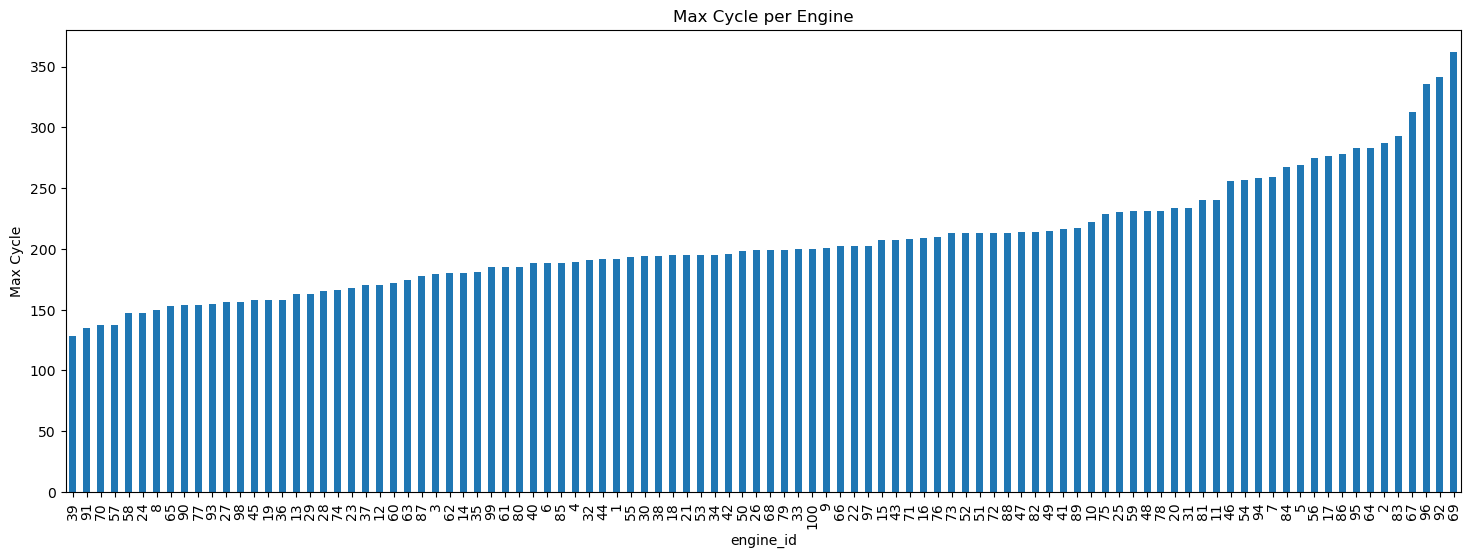

In [ ]:
plt.figure(figsize=(18, 6))
(train_df.groupby("engine_id")["cycle"].max().sort_values(ascending=True)).plot(kind="bar") # Sorted for easier identification of Engine's Max cycle
plt.ylabel("Max Cycle")
plt.title("Max Cycle per Engine")
plt.show()

In [8]:
train_df.columns

Index(['engine_id', 'cycle', 'op_setting_1', 'op_setting_2', 'op_setting_3',
       'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11',
       'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16',
       'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'RUL',
       'failure'],
      dtype='object')

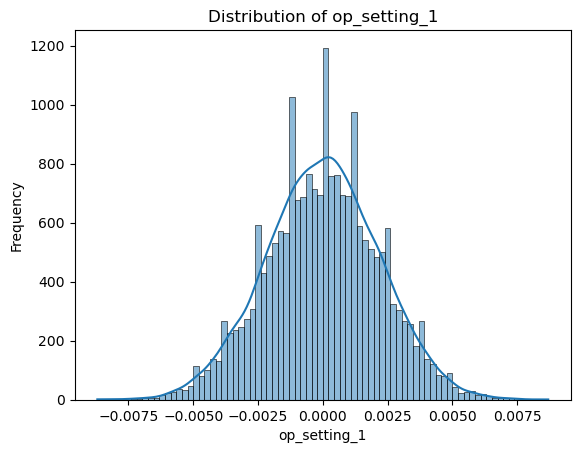

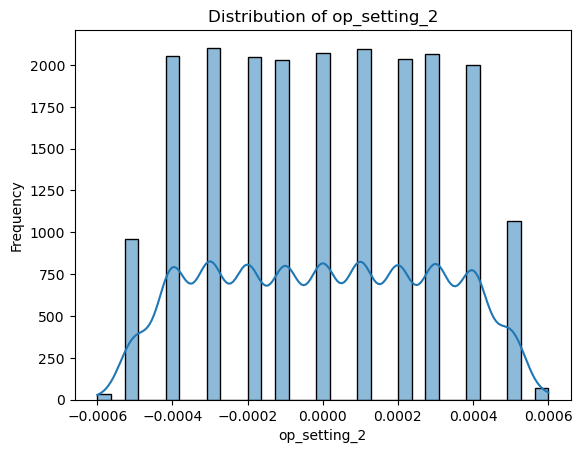

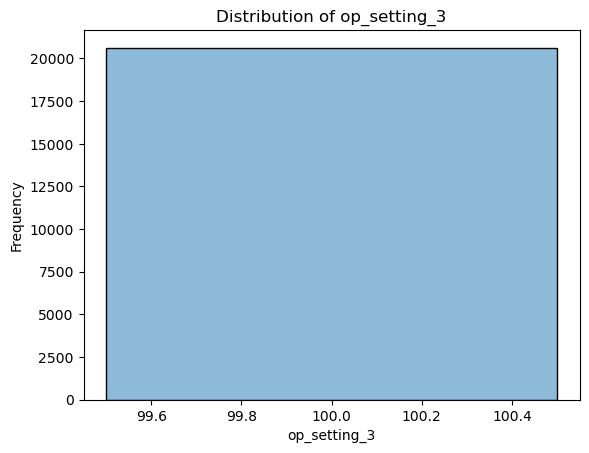

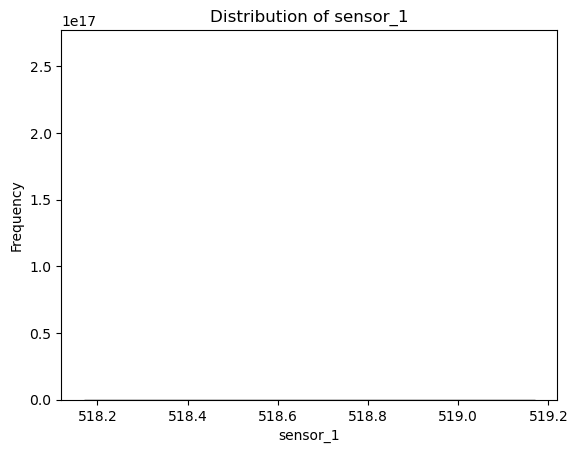

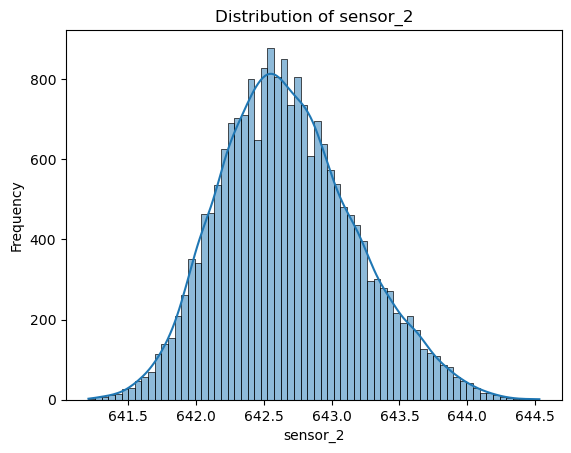

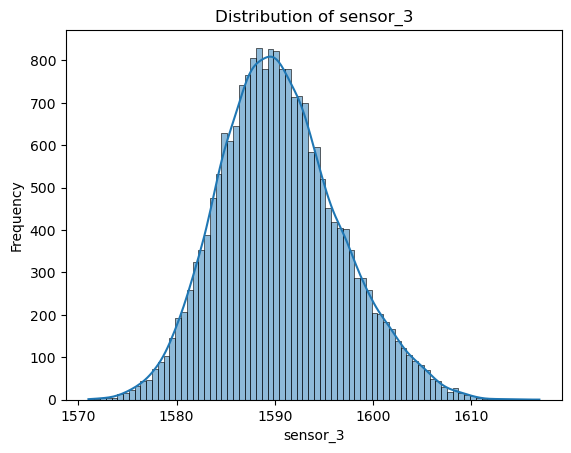

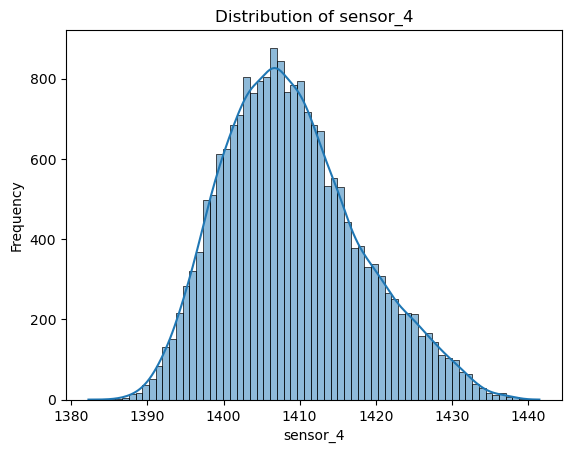

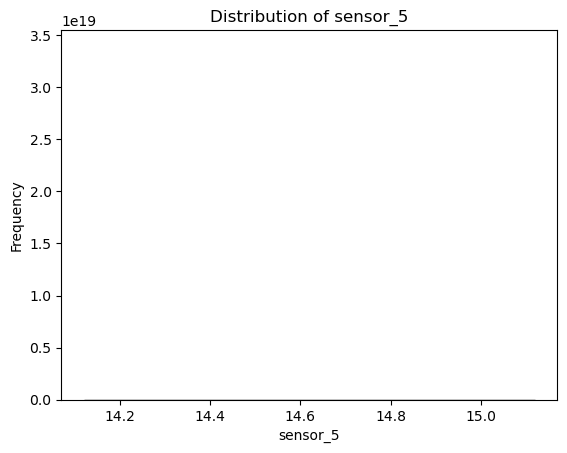

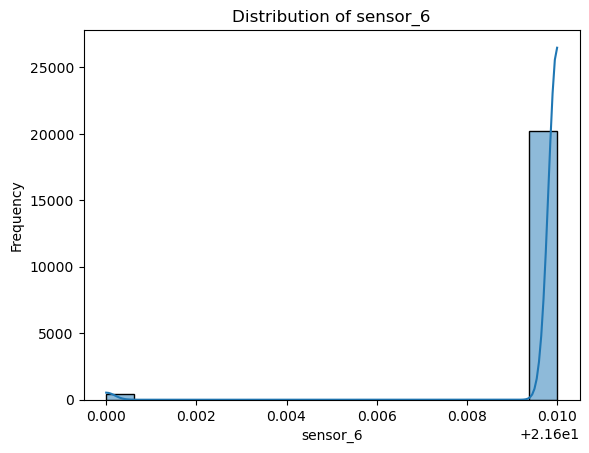

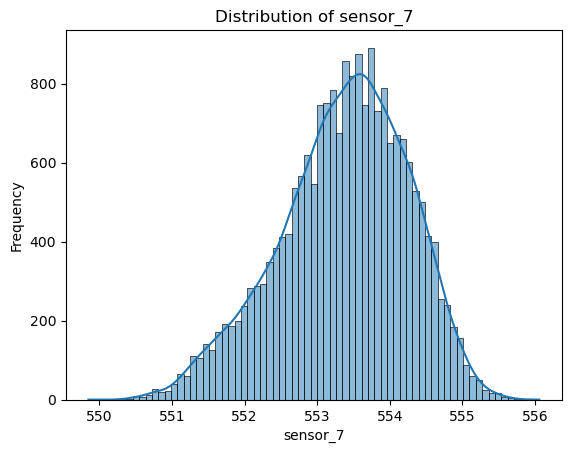

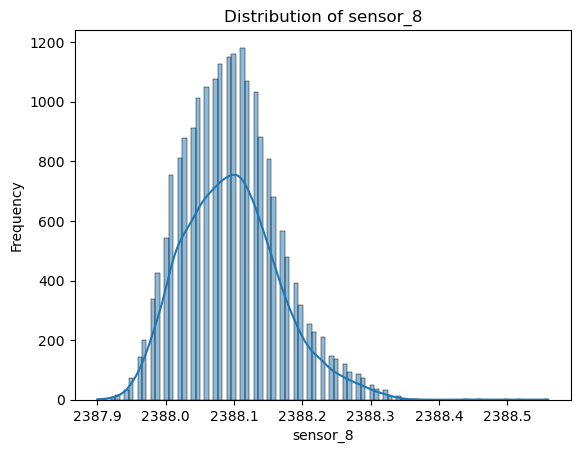

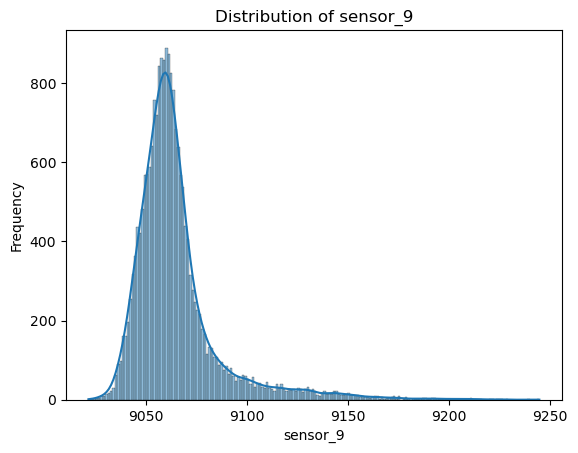

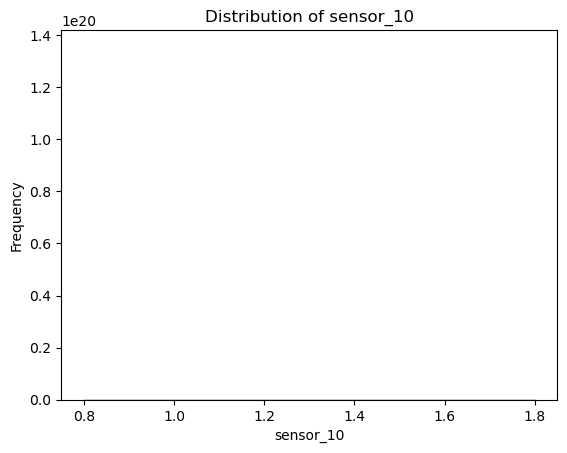

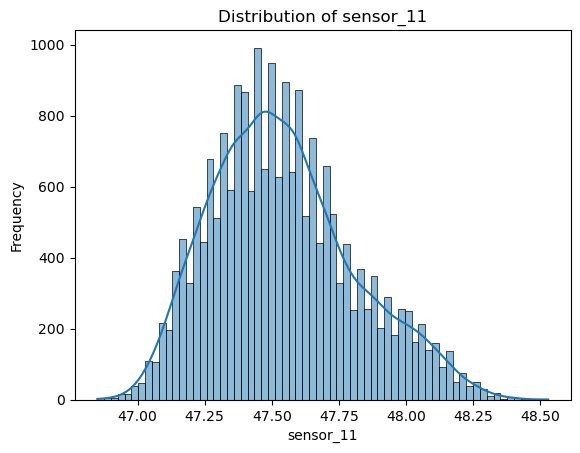

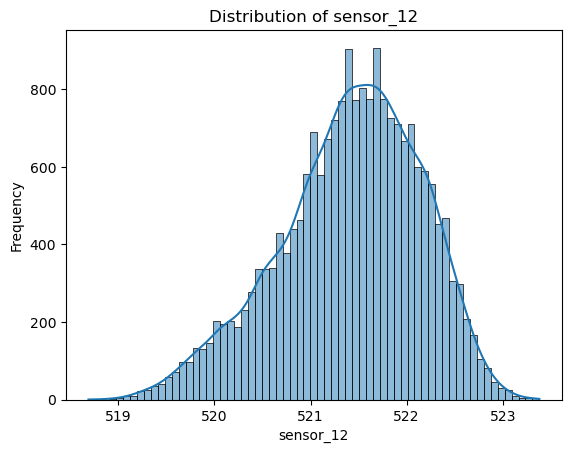

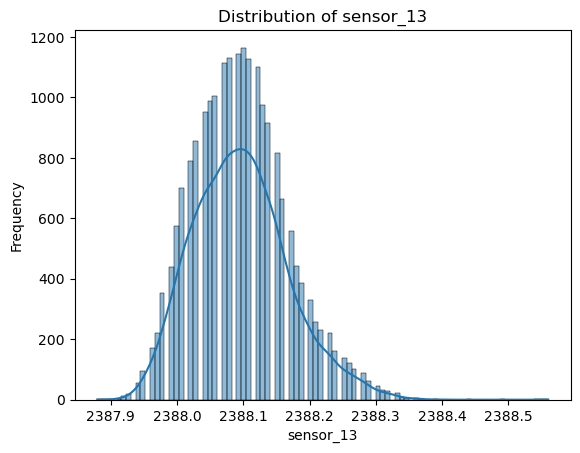

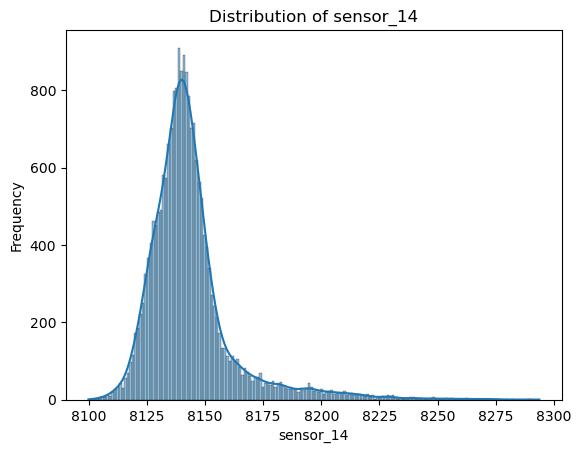

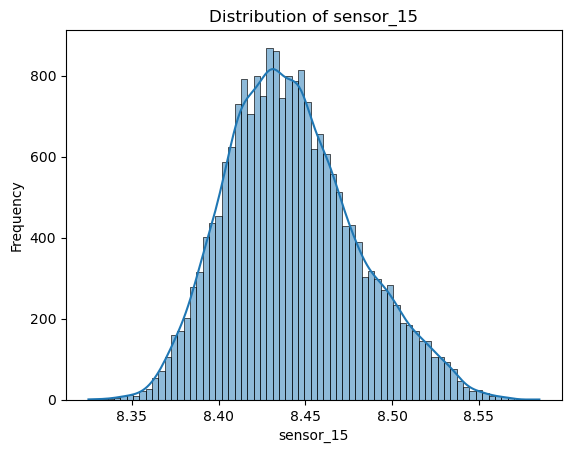

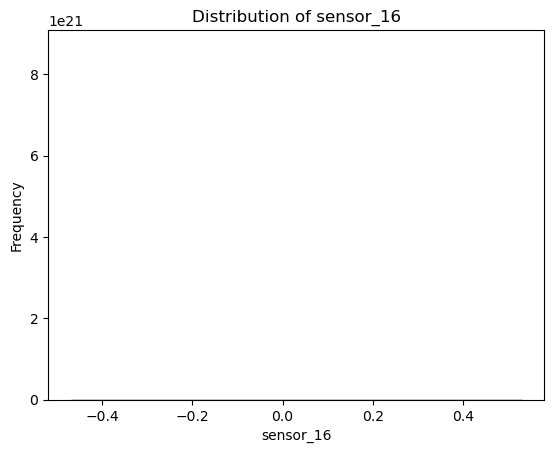

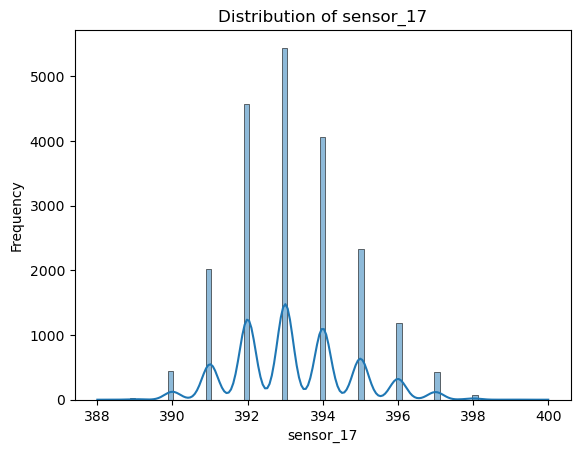

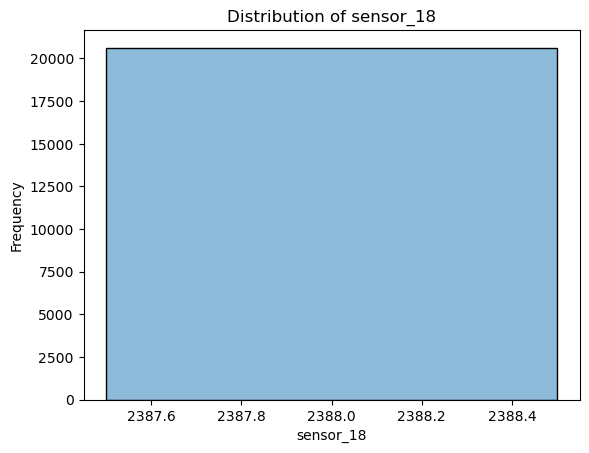

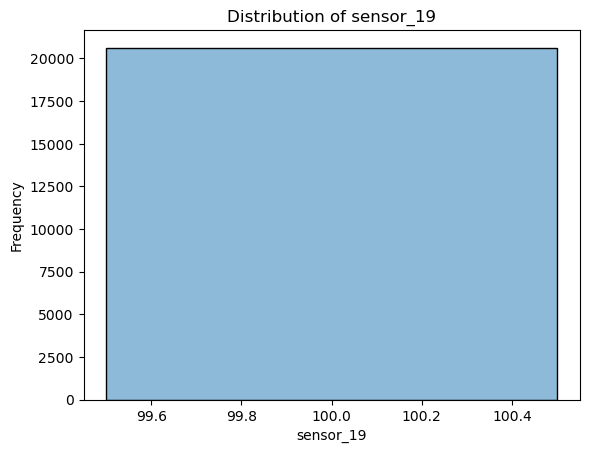

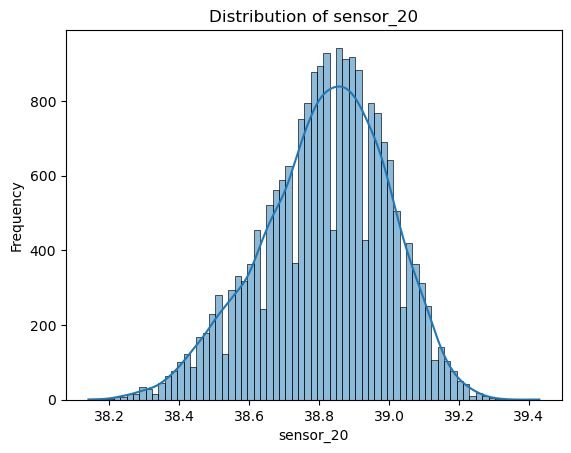

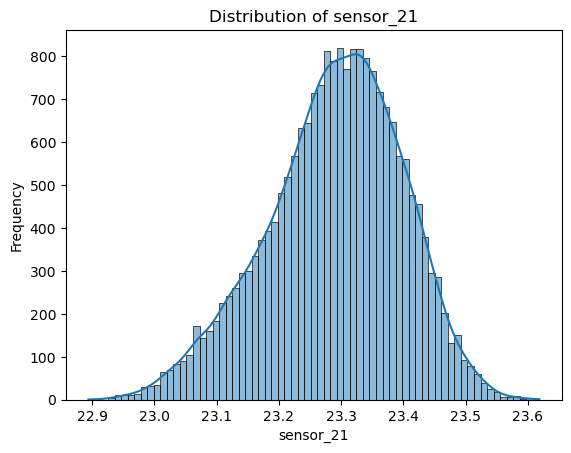

In [9]:
for x in train_df.columns:
  if x not in ["engine_id","cycle","RUL","failure"]:
    sns.histplot(train_df[x], kde=True)
    plt.title(f"Distribution of {x}")
    plt.xlabel(x)
    plt.ylabel("Frequency")
    plt.show()